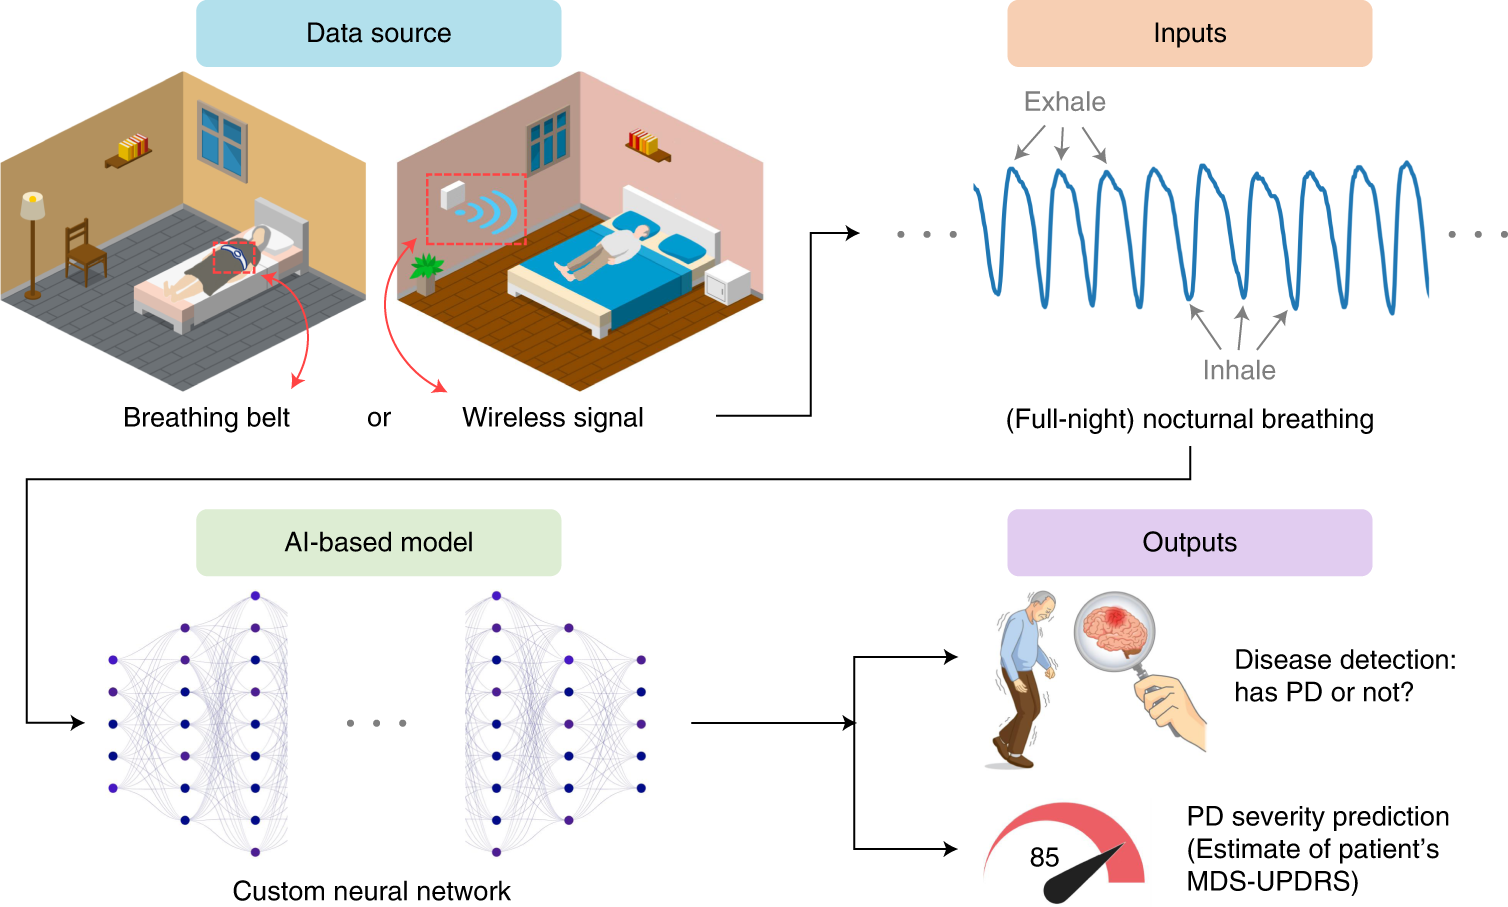

#

# Parkinson's Disease Detection

#

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\ZMZM\Desktop\Dataset\parkinsons.csv')
pd.set_option('display.max_columns', None)

df.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,0.456,0.02328,0.03526,0.03243,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,0.140,0.00779,0.00937,0.01351,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,0.134,0.00829,0.00946,0.01256,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,0.191,0.01073,0.01277,0.01717,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,0.255,0.01441,0.01725,0.02444,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


name - ASCII subject name and recording number

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%) , MDVP:Jitter(Abs) , MDVP:RAP , MDVP:PPQ , Jitter:DDP - Several measures of variation in fundamental frequency

MDVP:Shimmer , MDVP:Shimmer(dB) , Shimmer:APQ3 , Shimmer:APQ5 , MDVP:APQ , Shimmer:DDA - Several measures of variation in amplitude

NHR , HNR - Two measures of ratio of noise to tonal components in the voice

status - Health status of the subject (one) - Parkinson's, (zero) - healthy

RPDE , D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1 , spread2 , PPE - Three nonlinear measures of fundamental frequency variation



In [3]:
df.shape

(195, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [5]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [6]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [7]:
df['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

## 1 ➡ Parkinson's Positive
## 0 ➡ Healthy

## ____________________________________________________________________________


## 🔹 Data Pre-Processing

### Separating the features & target

In [8]:
X = df.drop(columns=['name','status'], axis=1)
y = df['status']

In [9]:
print(X)
print("========================")
print(y)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

### Splitting the data to training data & test data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

In [11]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


## ____________________________________________________________________________

## 🔹 Data Standardization

In [12]:
scaler = StandardScaler()

In [13]:
scaler.fit(X_train)

StandardScaler()

In [14]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [15]:
print(X_train)

[[ 0.68061296  0.19876509  1.05286796 ...  1.64125301  2.10033836
   1.48228605]
 [ 0.55364638  0.04253347  0.58132502 ...  1.39796712  0.77021891
  -0.67917906]
 [-0.1671969  -0.46288083  0.44176523 ...  0.24286134  1.29027827
  -0.13601035]
 ...
 [ 1.94308925  0.50166779 -0.32281611 ... -0.59238004 -0.37181444
  -0.96096842]
 [-1.14523259 -0.92124291 -0.27220651 ... -0.45296821 -0.8364609
  -0.46310141]
 [-0.29694342 -0.39298773 -1.17469784 ... -0.75600724 -0.25536941
  -0.27036886]]


## ____________________________________________________________________________


## 🟢 Model Training ➡ Support Vector Machine (SVM)

In [16]:
model = svm.SVC(kernel='linear')

In [17]:
model.fit(X_train,y_train)

SVC(kernel='linear')

## ____________________________________________________________________________

## 🔹 Model Evaluation

In [18]:
X_training_pred = model.predict(X_train)

training_data_accuracy = accuracy_score(X_training_pred, y_train)

print("Accuracy score of training data is: " , training_data_accuracy)

Accuracy score of training data is:  0.9166666666666666


In [19]:
X_testing_pred = model.predict(X_test)

testing_data_accuracy = accuracy_score(X_testing_pred, y_test)

print("Accuracy score of testing data is: " , testing_data_accuracy)

Accuracy score of testing data is:  0.9230769230769231


## ____________________________________________________________________________

## 🤖 Making a Predective System

In [20]:
input_data = (197.076,206.896,192.055,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.097,0.00563,0.0068,0.00802,0.01689,0.00339,26.775,0.422229,0.741367,-7.3483,0.177551,1.743867,0.085569)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is Healthy')
else:
  print('The person has Parkinsons disease')

[[ 1.00548253  0.09089088  1.7665841  -0.71820015 -0.97064186 -0.58052262
  -0.6816739  -0.58063632 -1.03028906 -0.99751324 -1.01244697 -0.96195947
  -1.03359538 -1.01247352 -0.53744918  1.15388851 -0.73604629  0.41892075
  -1.5393713  -0.52808575 -1.71075515 -1.34572233]]
[0]
The person is Healthy


#

# Regards, Tariq Ibrahim